## Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Caracteristicas

In [13]:
dataset = pd.read_csv('Reduced.csv')
X = dataset.iloc[:,1:].values

## Labels

In [16]:
dataset = pd.read_csv('Labels.csv')
Y= dataset.iloc[:,2].values

## Data split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [21]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[5 5]
 [0 0]
 [5 5]
 [3 3]
 [5 5]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [5 3]
 [2 2]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [5 5]
 [0 0]
 [2 0]
 [3 3]
 [5 5]
 [3 0]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [1 1]
 [3 3]
 [2 1]
 [4 4]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [5 5]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [5 5]
 [2 1]
 [2 2]
 [0 1]
 [0 0]
 [5 5]
 [5 5]
 [2 2]
 [2 2]
 [1 0]
 [5 5]
 [2 3]
 [1 2]
 [3 3]
 [2 3]
 [1 3]
 [1 1]
 [4 4]
 [5 2]
 [3 3]
 [0 0]
 [1 3]
 [0 0]
 [2 2]
 [2 2]
 [3 3]
 [1 3]
 [0 0]
 [3 3]
 [1 1]
 [1 3]
 [5 5]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [5 5]
 [0 2]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [5 5]
 [1 1]
 [1 1]
 [0 2]
 [4 4]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [0 0]
 [5 5]
 [0 3]
 [3 3]
 [5 5]
 [2 3]
 [4 4]
 [2 3]
 [4 4]
 [0 0]
 [0 5]
 [1 1]
 [5 5]
 [0 5]
 [1 4]
 [3 3]
 [5 5]
 [5 5]
 [0 1]
 [5 5]
 [2 2]
 [1 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [5 5]
 [5 5]
 [5 2]
 [3 3]
 [5 5]
 [5 3]
 [3 3]
 [0 0]

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[32  1  1  1  0  0]
 [ 3 24  2  0  0  0]
 [ 2  3 19  0  0  2]
 [ 2  4  4 23  0  3]
 [ 0  2  0  0  8  0]
 [ 2  0  0  0  0 29]]


0.8083832335329342

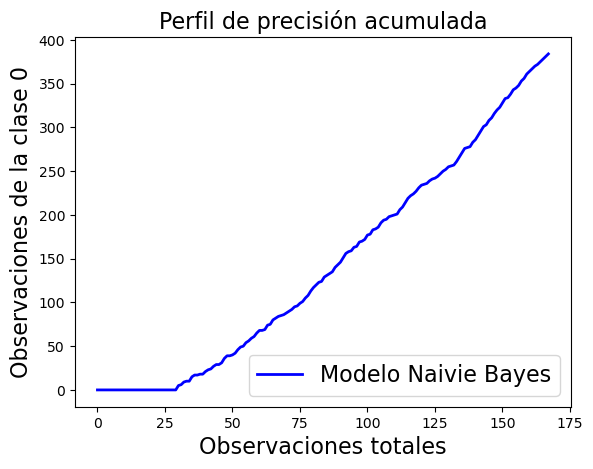

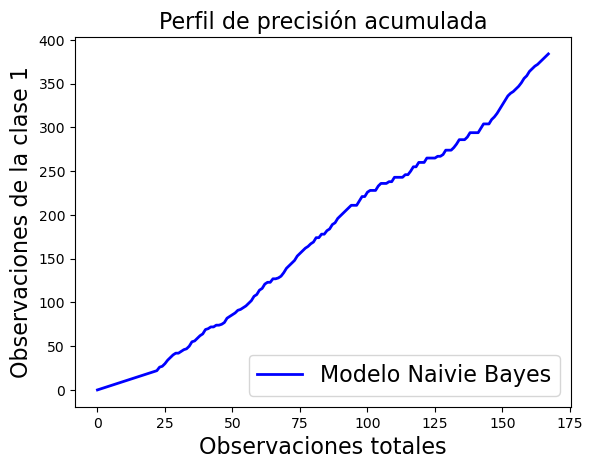

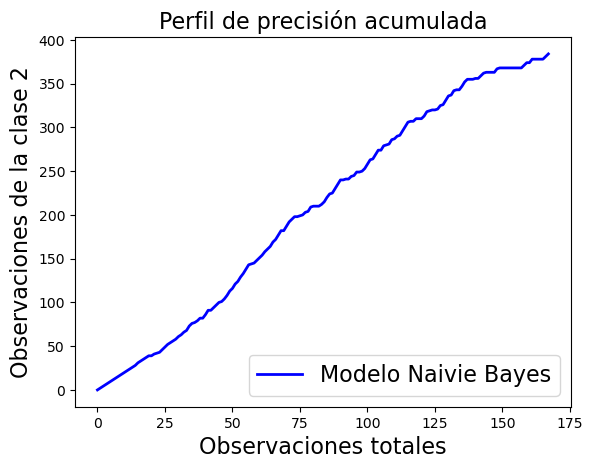

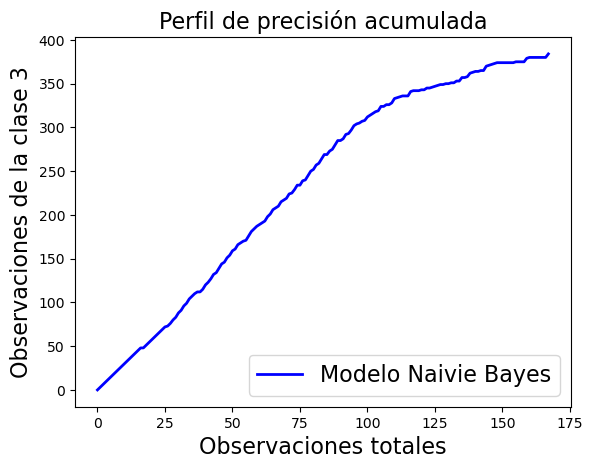

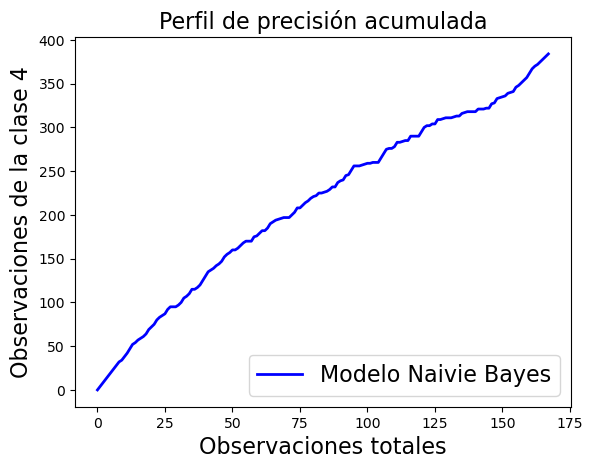

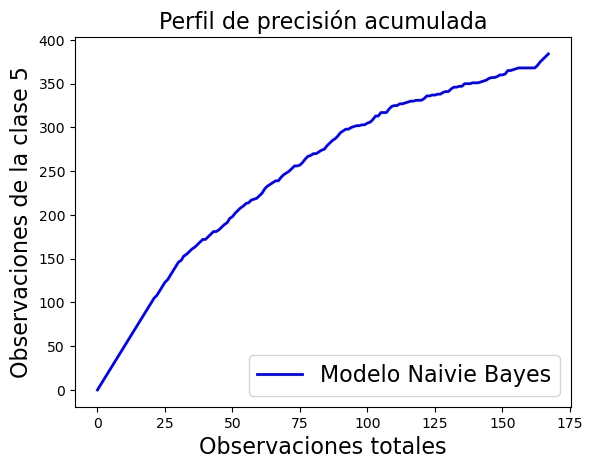

In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

for i in range(6):
    probs = classifier.predict_proba(X_test)[:,i]
    model_y = [y for _, y in sorted(zip(probs,Y_test), reverse=True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total+1)
    plt.plot(x_values,y_values,c = 'b',label = 'Modelo Naivie Bayes',linewidth = 2)
    plt.xlabel('Observaciones totales', fontsize = 16)
    plt.ylabel('Observaciones de la clase '+str(i), fontsize = 16)
    plt.title('Perfil de precisión acumulada', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)
    plt.show()

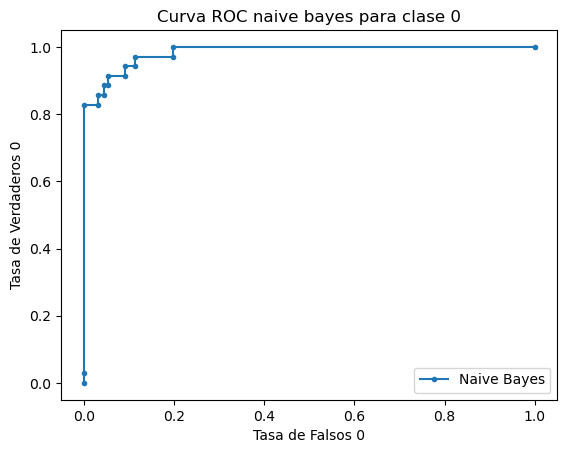

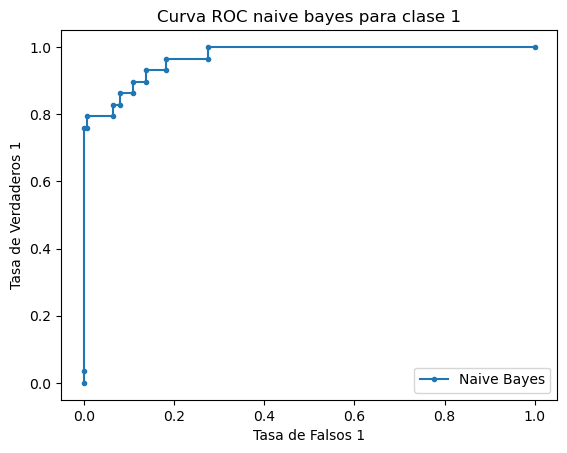

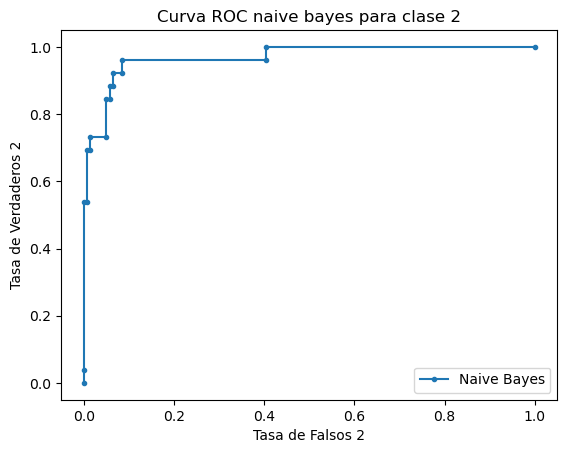

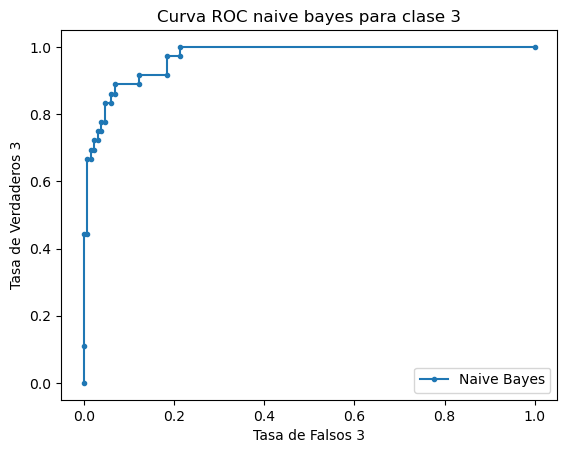

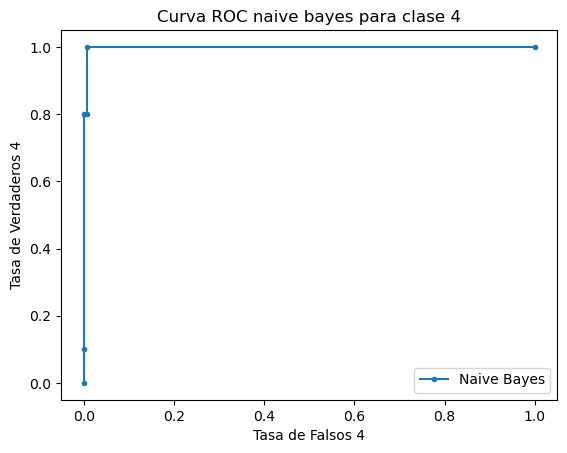

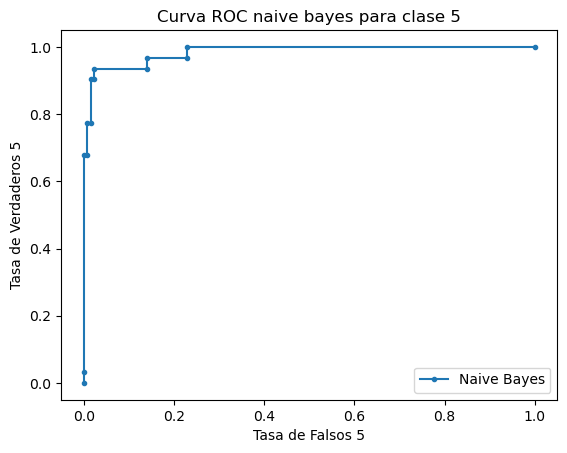

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for i in range(6):
    lr_probs =  classifier.predict_proba(X_test)[:,i]
    # Calculamos las curvas ROC
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs,pos_label=i) 
    # Pintamos las curvas ROC
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
    # Etiquetas de los ejes
    plt.xlabel('Tasa de Falsos '+str(i))
    plt.ylabel('Tasa de Verdaderos '+str(i))
    plt.ylabel('Tasa de Verdaderos '+str(i))
    plt.title('Curva ROC naive bayes para clase '+str(i))
    plt.legend()
    plt.show()

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[33  1  1  0  0  0]
 [ 3 24  2  0  0  0]
 [ 0  1 20  2  0  3]
 [ 1  0  0 33  0  2]
 [ 0  2  0  2  6  0]
 [ 1  0  1  8  0 21]]


0.8203592814371258

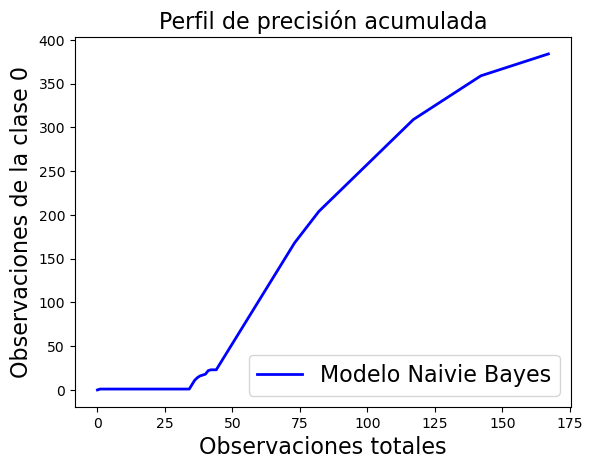

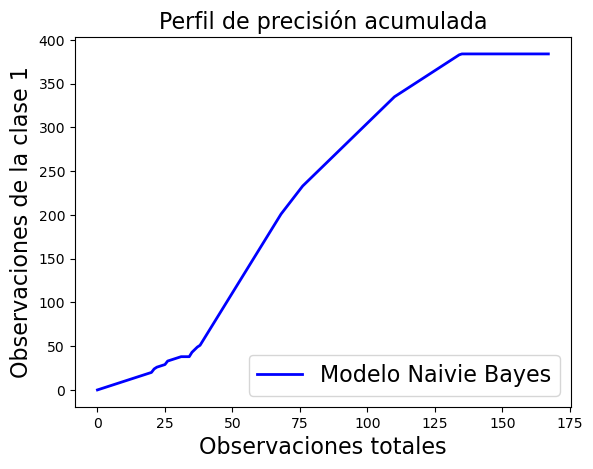

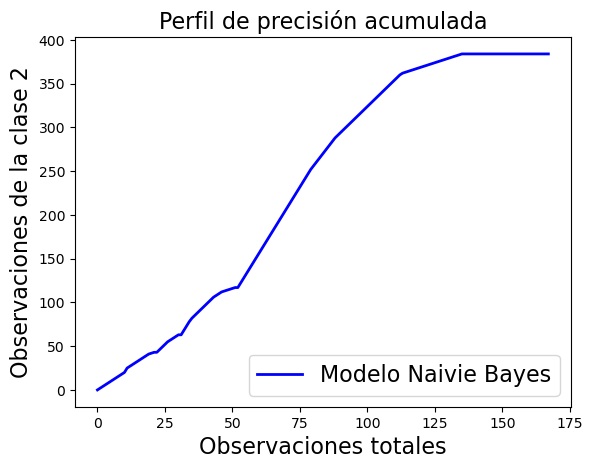

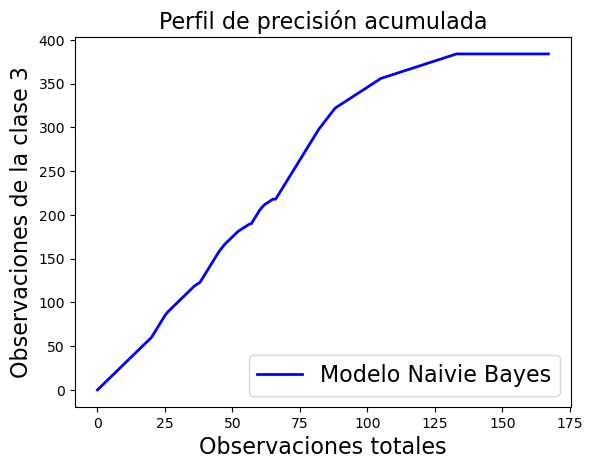

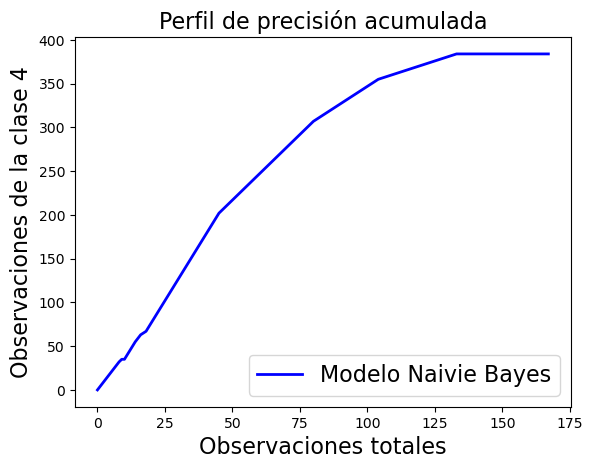

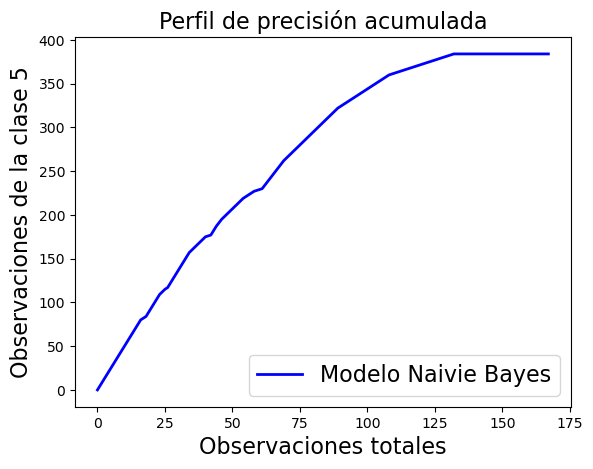

In [82]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

for i in range(6):
    probs = classifier.predict_proba(X_test)[:,i]
    model_y = [y for _, y in sorted(zip(probs,Y_test), reverse=True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total+1)
    plt.plot(x_values,y_values,c = 'b',label = 'Modelo Naivie Bayes',linewidth = 2)
    plt.xlabel('Observaciones totales', fontsize = 16)
    plt.ylabel('Observaciones de la clase '+str(i), fontsize = 16)
    plt.title('Perfil de precisión acumulada', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)
    plt.show()

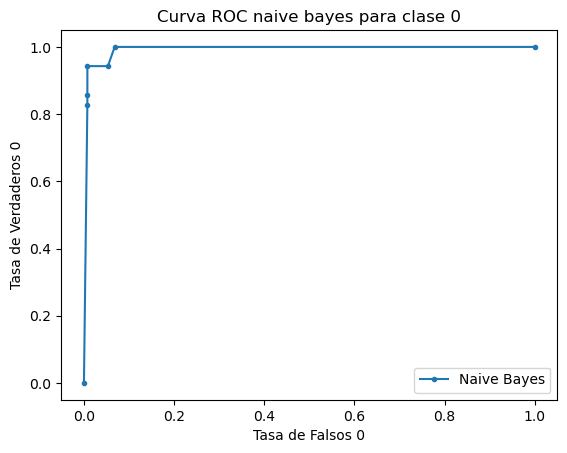

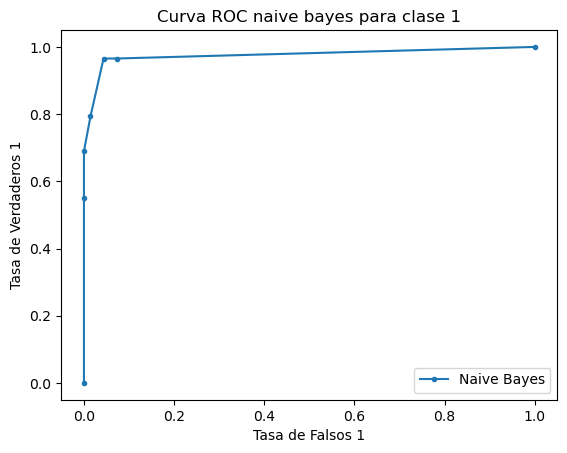

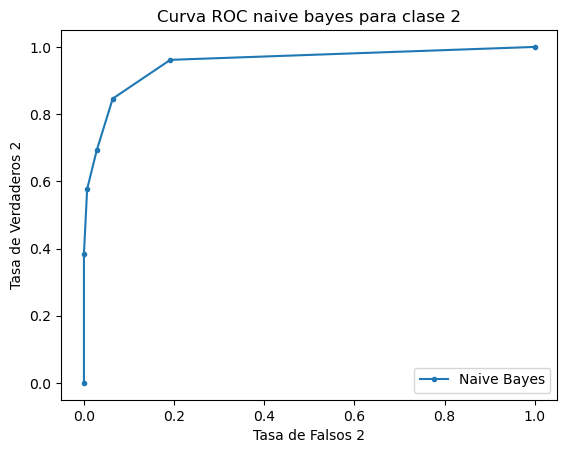

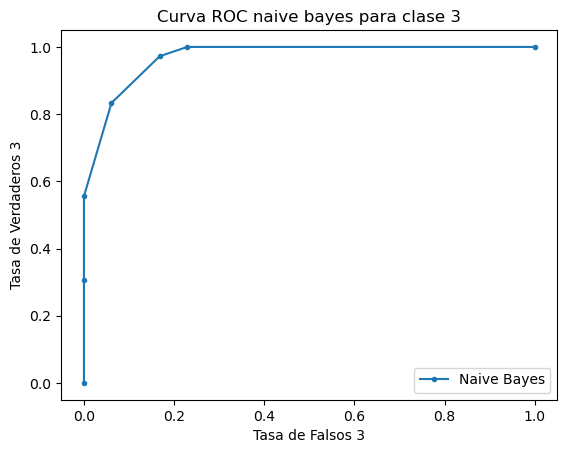

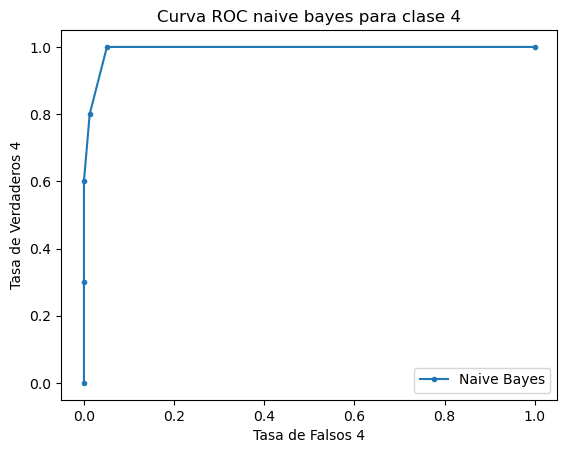

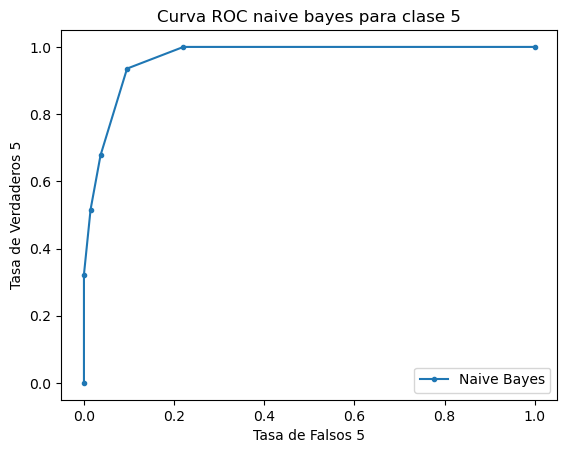

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for i in range(6):
    lr_probs =  classifier.predict_proba(X_test)[:,i]
    # Calculamos las curvas ROC
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs,pos_label=i) 
    # Pintamos las curvas ROC
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
    # Etiquetas de los ejes
    plt.xlabel('Tasa de Falsos '+str(i))
    plt.ylabel('Tasa de Verdaderos '+str(i))
    plt.ylabel('Tasa de Verdaderos '+str(i))
    plt.title('Curva ROC naive bayes para clase '+str(i))
    plt.legend()
    plt.show()